<a href="https://colab.research.google.com/github/Angelo254/Week-5-Group-Project/blob/main/Moringa_Data_Science_Prep_W5_GROUP_Project_2021_GROUP_FIVE_DataCleaning_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Overall objective:
To understand the burden of air pollution on the health sector by finding the relationship between mortality rates due to respiratory diseases and air pollutant concentrations in Africa

In [ ]:
#importing libraries
import pandas as pd

import numpy as np



*  Mortality rate dataset



In [ ]:
#Function to load the Mortality rate dataset
def  Mortality_rate(type, path):
  if type == 'csv':
    Mortality_data = pd.read_csv(path)
    return Mortality_data
M_data = Mortality_rate('csv','/content/Death due to respiratory conditions (new).csv')
M_data.head()


,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,IsLatestYear,Dim1 type,Dim1,Dim1ValueCode,Dim2 type,Dim2,Dim2ValueCode,Dim3 type,Dim3,Dim3ValueCode,DataSourceDimValueCode,DataSource,FactValueNumericPrefix,FactValueNumeric,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,AIR_5,Ambient air pollution attributable death rate ...,numeric,AFR,Africa,Country,MWI,Malawi,Year,2016,True,Sex,Female,FMLE,Cause,"Trachea, bronchus, lung cancers",ENVCAUSE068,NaN,NaN,NaN,NaN,NaN,NaN,0.040,NaN,NaN,0.022,NaN,0.061,0.04 [0.022 – 0.061],NaN,NaN,EN,2018-07-05T21:00:00.000Z
1,AIR_5,Ambient air pollution attributable death rate ...,numeric,AFR,Africa,Country,NER,Niger,Year,2016,True,Sex,Female,FMLE,Cause,"Trachea, bronchus, lung cancers",ENVCAUSE068,NaN,NaN,NaN,NaN,NaN,NaN,0.047,NaN,NaN,0.032,NaN,0.062,0.047 [0.032 – 0.062],NaN,NaN,EN,2018-07-05T21:00:00.000Z
2,AIR_5,Ambient air pollution attributable death rate ...,numeric,AFR,Africa,Country,TZA,United Republic of Tanzania,Year,2016,True,Sex,Female,FMLE,Cause,"Trachea, bronchus, lung cancers",ENVCAUSE068,NaN,NaN,NaN,NaN,NaN,NaN,0.051,NaN,NaN,0.029,NaN,0.076,0.051 [0.029 – 0.076],NaN,NaN,EN,2018-07-05T21:00:00.000Z
3,AIR_5,Ambient air pollution attributable death rate ...,numeric,AFR,Africa,Country,TZA,United Republic of Tanzania,Year,2016,True,Sex,Both sexes,BTSX,Cause,"Trachea, bronchus, lung cancers",ENVCAUSE068,NaN,NaN,NaN,NaN,NaN,NaN,0.055,NaN,NaN,0.031,NaN,0.083,0.055 [0.031 – 0.083],NaN,NaN,EN,2018-07-05T21:00:00.000Z
4,AIR_5,Ambient air pollution attributable death rate ...,numeric,AFR,Africa,Country,MWI,Malawi,Year,2016,True,Sex,Both sexes,BTSX,Cause,"Trachea, bronchus, lung cancers",ENVCAUSE068,NaN,NaN,NaN,NaN,NaN,NaN,0.056,NaN,NaN,0.030,NaN,0.086,0.056 [0.03 – 0.086],NaN,NaN,EN,2018-07-05T21:00:00.000Z


In [ ]:
# Infor about the Death due to respiratory conditions
M_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IndicatorCode               3294 non-null   object 
 1   Indicator                   3294 non-null   object 
 2   ValueType                   3294 non-null   object 
 3   ParentLocationCode          3294 non-null   object 
 4   ParentLocation              3294 non-null   object 
 5   Location type               3294 non-null   object 
 6   SpatialDimValueCode         3294 non-null   object 
 7   Location                    3294 non-null   object 
 8   Period type                 3294 non-null   object 
 9   Period                      3294 non-null   int64  
 10  IsLatestYear                3294 non-null   bool   
 11  Dim1 type                   3294 non-null   object 
 12  Dim1                        3294 non-null   object 
 13  Dim1ValueCode               3294 

* Cleaning the Mortality rate dataset.




In [ ]:
# Mortality_data.head(5)
#Getting rid of null values
M_data.isnull().any()
M_data.dropna(axis=1,how='all',inplace=True)
M_data.head()
# Mortality_data.info()
# Dropping unnecessary columns
D_Mortality_data= M_data.drop(M_data.columns[[0,2,3,5,6,8,10,11,13,14,16,20,21,22]], axis = 1)
D_Mortality_data
#Renaming columns 
Africa_df=D_Mortality_data.rename(columns={'ParentLocation':'Continent','Location':'Country','Period':'Year','Dim1':'Gender','Dim2':'Cause'})
Africa_df
#Filtering out the African countries.
New_df=Africa_df[Africa_df['Continent']=='Africa']
New_df
#Constructing a new column with average
New_df['Average_death_Value']=New_df[['FactValueNumeric','FactValueNumericLow','FactValueNumericHigh']].mean(axis=1)
D_New_df=New_df.drop(New_df.columns[[6,7,8]],axis=1)
#Dropping duplicates
D_New_df.duplicated()
D_New_df.drop_duplicates
# Dividing the countries into regions
D_New_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Indicator,Continent,Country,Year,Gender,Cause,Average_death_Value
0,Ambient air pollution attributable death rate ...,Africa,Malawi,2016,Female,"Trachea, bronchus, lung cancers",0.041000
1,Ambient air pollution attributable death rate ...,Africa,Niger,2016,Female,"Trachea, bronchus, lung cancers",0.047000
2,Ambient air pollution attributable death rate ...,Africa,United Republic of Tanzania,2016,Female,"Trachea, bronchus, lung cancers",0.052000
3,Ambient air pollution attributable death rate ...,Africa,United Republic of Tanzania,2016,Both sexes,"Trachea, bronchus, lung cancers",0.056333
4,Ambient air pollution attributable death rate ...,Africa,Malawi,2016,Both sexes,"Trachea, bronchus, lung cancers",0.057333


In [ ]:
#confirming operation
New_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3263    False
3265    False
3269    False
3274    False
3280    False
Length: 954, dtype: bool



* Particulate Matter Concentration



In [ ]:
#Loading the PM emission dataset
def  PM_emission(type, path):
  if type == 'csv':
    PM_dataset = pd.read_csv(path)
    return PM_dataset
PM_data = PM_emission('csv','/content/Particulate Matter Concentration world wide...csv')
PM_data.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,IsLatestYear,Dim1 type,Dim1,Dim1ValueCode,Dim2 type,Dim2,Dim2ValueCode,Dim3 type,Dim3,Dim3ValueCode,DataSourceDimValueCode,DataSource,FactValueNumericPrefix,FactValueNumeric,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,EUR,Europe,Country,LVA,Latvia,Year,2016,True,Residence Area Type,Rural,RUR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.00,NaN,NaN,8.33,NaN,12.10,10 [8.33 – 12.1],NaN,NaN,EN,2021-05-06T21:00:00.000Z
1,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,EUR,Europe,Country,LUX,Luxembourg,Year,2016,True,Residence Area Type,Total,TOTL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.02,NaN,NaN,9.25,NaN,10.72,10.02 [9.25 – 10.72],NaN,NaN,EN,2021-05-06T21:00:00.000Z
2,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,EUR,Europe,Country,SMR,San Marino,Year,2016,True,Residence Area Type,Total,TOTL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.06,NaN,NaN,7.63,NaN,13.76,10.06 [7.63 – 13.76],NaN,NaN,EN,2021-05-06T21:00:00.000Z
3,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,EUR,Europe,Country,SMR,San Marino,Year,2016,True,Residence Area Type,Urban,URB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.06,NaN,NaN,7.63,NaN,13.76,10.06 [7.63 – 13.76],NaN,NaN,EN,2021-05-06T21:00:00.000Z
4,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,EUR,Europe,Country,DNK,Denmark,Year,2016,True,Residence Area Type,Urban,URB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.11,NaN,NaN,9.36,NaN,11.31,10.11 [9.36 – 11.31],NaN,NaN,EN,2021-05-06T21:00:00.000Z




* Cleaning the Particulate Matter concentration




In [ ]:
# PM_dataset.head(5)
#Getting rid of null values
PM_data.isnull().any()
PM_data.dropna(axis=1,how='all',inplace=True)
PM_data.head()
# PM_dataset.info()
# Dropping unnecessary columns
DPM_dataset= PM_data.drop(PM_data.columns[[0,2,3,5,6,8,10,11,13,17,18,19]], axis = 1)
DPM_dataset
# Renaming columns 
PM_Africa_df=DPM_dataset.rename(columns={'ParentLocation':'Continent','Location':'Country','Period':'Year','Dim1':'Status'})
PM_Africa_df
# Filtering out the African countries.
Our_New_df=PM_Africa_df[PM_Africa_df['Continent']=='Africa']
Our_New_df
# Constructing a new column with average
Our_New_df['Average_PM_Value']=Our_New_df[['FactValueNumeric','FactValueNumericLow','FactValueNumericHigh']].mean(axis=1)
D_Our_New_df=Our_New_df.drop(Our_New_df.columns[[5,6,7]],axis=1)
# Dropping duplicates
D_Our_New_df.duplicated()
D_Our_New_df.drop_duplicates
# PM concentration infor
D_Our_New_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Indicator,Continent,Country,Year,Status,Average_PM_Value
18,Concentrations of fine particulate matter (PM2.5),Africa,Mauritius,2016,Total,11.426667
43,Concentrations of fine particulate matter (PM2.5),Africa,Mauritius,2016,Rural,12.173333
81,Concentrations of fine particulate matter (PM2.5),Africa,Seychelles,2016,Urban,15.043333
82,Concentrations of fine particulate matter (PM2.5),Africa,Seychelles,2016,Total,15.013333
83,Concentrations of fine particulate matter (PM2.5),Africa,Seychelles,2016,Rural,14.963333


In [ ]:
#Confirming our Operation on PM dataset
Our_New_df.duplicated()

18      False
43      False
81      False
82      False
83      False
        ...  
3977    False
4004    False
4019    False
4020    False
4025    False
Length: 987, dtype: bool

WHO Emission database

In [ ]:
#Loading the dataset
def  WHO_data(type, path):
  if type == 'csv':
    WHO_dataset = pd.read_csv(path)
    return WHO_dataset
WHO_df = WHO_data('csv','/content/WHO_AirQuality_Database_2016_Africa.csv')
WHO_df.head(1)

,ID WHO city,iso3,country,city,pm10,Year,type_of_stations,pm10_type,pm25,pm25_type,reference,latitude,longitude,population,wbinc16_text,region,date_compiled,population_source,tempcov_PM10,tempcov_PM25,latitude_pop,longitude_pop,Region,region_abbr,tempcov_PM10_grad,tempcov_PM25_grad,conc_pm25,color_pm25,conc_pm10,color_pm10
0,NaN,ALB,Albania,Durres,24.531701,2016,1 Urban-Traffic,Measured,14.298273,Measured,The European Environmental Agency (EEA) [downl...,41.3199,19.4492,113249.0,Upper middle income,Eur_LM,2018,1 manual,0.92418,0.92418,NaN,NaN,Europe (LMIC),Eur (LMIC),>75%,>75%,10-<15,yellow,20-<30,yellow




* Cleaning the WHO emission database



In [ ]:
#Getting rid of null values
WHO_df.isnull().any()
WHO_df.dropna(axis=1,how='all',inplace=True)
WHO_df.head()
#Dropping unnesessary columns
D_WHO_dataset=WHO_df.drop(WHO_df.columns[[0,5,6,8,9,10,11,14,15,16,17,18,19,20,22,23,24,25,26,27,28]],axis=1)
D_WHO_dataset
#Filtering out the African Region
WHO_New_df=D_WHO_dataset[D_WHO_dataset['Region']=='Africa (Sub-Saharan) (LMIC)']
WHO_New_df
#Renaming the columns
WHO_Africa_df=WHO_New_df.rename(columns={'wbinc16_text':'Income_status','Region':'Continent'})
WHO_Africa_df
# Organising Columns
Clean_WHO_Africa_df=WHO_Africa_df.replace('Africa (Sub-Saharan) (LMIC)','Africa')
Clean_WHO_Africa_df


,country,city,pm10,Year,pm25,population,Income_status,Continent
2183,Mauritius,Port Louis,13.21,2016,6.467670,135496.0,Upper middle income,Africa
2184,Mauritius,Vacoas-Phoenix,15.15,2016,7.417502,105253.0,Upper middle income,Africa
2509,Senegal,Dakar,145.50,2016,25.000000,3520215.0,Low income,Africa
2960,Ghana,Accra,112.20,2016,55.000000,2277298.0,Lower middle income,Africa


In [ ]:
Clean_WHO_Africa_df.duplicated()

2183    False
2184    False
2509    False
2960    False
dtype: bool



* Cleaning CO2 dataset



In [ ]:
#Functions to load the CO2 datasets
def  data_emission(type, path):
  if type == 'csv':
    CO2_dataset = pd.read_csv(path)
    return CO2_dataset
CO2_data = data_emission('csv', '/content/CO2 Emission in KT. in excel.csv')
CO2_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Africa Eastern and Southern,AFE,CO2 emissions (kt),EN.ATM.CO2E.KT,118545.9013,123758.9033,128093.8978,132810.3325,144345.3524,155803.7801,157932.2573,165066.0405,174004.8927,182939.9843,191243.3018,213550.9464,217837.9853,223290.2332,226298.370,231987.5087,240665.9833,246129.5118,250630.4364,268619.0944,280929.8942,308901.8061,329541.3846,344021.803,365909.7583,374516.7897,385101.671,388106.0476,404605.6778,401747.9479,309980.8254,304407.7236,300329.9719,306574.5771,312677.0287,330892.999,341412.3664,357963.1087,366634.4792,352429.2715,358460.6463,397075.6603,409057.1792,434533.1377,466883.2388,468365.6979,476590.2999,500147.1845,533634.5146,515682.5438,543808.6518,535604.3575,559333.8573,580510.925,601860.164,586385.004,592299.594,601323.3947,600351.1333,NaN,NaN
1,Africa Western and Central,AFW,CO2 emissions (kt),EN.ATM.CO2E.KT,8760.4630,9376.5190,9710.2160,11540.0490,13985.9380,19827.4690,21246.5980,21239.2640,16527.1690,23743.8250,36398.6420,48301.7240,58059.6110,69676.6670,84392.338,69995.6960,76900.6570,74154.0740,75045.1550,98319.6040,98913.6580,96889.4740,98755.9770,91337.636,101154.1950,104344.4850,99977.088,89694.8200,103820.1040,82562.5050,90210.0000,99880.0000,111590.0000,115080.0000,112220.0000,113980.000,121890.0000,120450.0000,116930.0000,118000.0000,119510.0000,130120.0000,133840.0000,137380.0000,141040.0000,155650.0000,153210.0000,153350.0000,157600.0000,145550.0000,165750.0000,179070.0000,181740.0000,191990.000,198440.000,193060.000,195120.000,201900.0000,224380.0000,NaN,NaN
2,Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,550.0500,454.7080,1180.7740,1151.4380,1224.7780,1188.1080,1554.8080,993.7570,1672.1520,2786.9200,3582.6590,3410.3100,4506.7430,4880.7770,4873.443,4415.0680,3285.6320,3534.9880,5412.4920,5504.1670,5346.4860,5280.4800,4649.7560,5115.465,5009.1220,4701.0940,4660.757,5815.8620,5130.1330,5009.1220,6330.0000,6530.0000,6370.0000,6900.0000,6690.0000,10780.000,11410.0000,11730.0000,11370.0000,12650.0000,12370.0000,12910.0000,13620.0000,18010.0000,19290.0000,18210.0000,20340.0000,23490.0000,25080.0000,27150.0000,28530.0000,29460.0000,30250.0000,32820.000,34630.000,35160.000,35410.000,30840.0000,27340.0000,NaN,NaN
3,Burundi,BDI,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,44.0040,47.6710,47.6710,36.6700,47.6710,47.6710,55.0050,73.3400,62.3390,73.3400,73.3400,73.3400,91.675,77.0070,88.0080,99.0090,102.6760,110.0100,146.6800,157.6810,157.6810,205.352,220.0200,231.0210,234.688,249.3560,227.3540,267.6910,190.0000,230.0000,200.0000,210.0000,210.0000,220.000,220.0000,230.0000,230.0000,230.0000,260.0000,210.0000,220.0000,170.0000,160.0000,160.0000,190.0000,190.0000,200.0000,200.0000,320.0000,370.0000,390.0000,410.000,390.000,410.000,460.000,570.0000,590.0000,NaN,NaN
4,Benin,BEN,CO2 emissions (kt),EN.ATM.CO2E.KT,161.3480,128.3450,135.6790,121.0110,143.0130,150.3470,113.6770,143.0130,154.0140,201.6850,282.3590,293.3600,388.7020,381.3680,407.037,443.7070,260.3570,297.0270,363.0330,366.7000,517.0470,429.0390,491.3780,454.708,502.3790,744.4010,685.729,539.0490,553.7170,630.7240,380.0000,330.0000,360.0000,420.0000,400.0000,460.000,1050.0000,1240.0000,1300.0000,1420.0000,1530.0000,1840.0000,2120.0000,2380.0000,2530.0000,2780.0000,3830.0000,4390.0000,4350.0000,4700.0000,5080.0000,4980.0000,4740.0000,5020.000,5510.000,5990.000,7230.000,7360.0000,7910.0000,NaN,NaN


In [ ]:
#Dropping the years 1970 to 2015 and the year afterwards
CO2_dropped_1= CO2_data.drop(CO2_data.iloc[:, 4:60].columns, axis = 1)
CO2_dropped_1
CO2_dropped_2= CO2_dropped_1.drop(CO2_dropped_1.iloc[:, 5:9].columns, axis = 1)
CO2_dropped_2.rename(columns={'Country Name':'Country'})


,Country,Country Code,Indicator Name,Indicator Code,2016
0,Africa Eastern and Southern,AFE,CO2 emissions (kt),EN.ATM.CO2E.KT,592299.594
1,Africa Western and Central,AFW,CO2 emissions (kt),EN.ATM.CO2E.KT,195120.000
2,Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,35410.000
3,Burundi,BDI,CO2 emissions (kt),EN.ATM.CO2E.KT,460.000
4,Benin,BEN,CO2 emissions (kt),EN.ATM.CO2E.KT,7230.000
...,...,...,...,...,...
56,Tanzania,TZA,CO2 emissions (kt),EN.ATM.CO2E.KT,10920.000
57,Uganda,UGA,CO2 emissions (kt),EN.ATM.CO2E.KT,5670.000
58,South Africa,ZAF,CO2 emissions (kt),EN.ATM.CO2E.KT,425180.000
59,Zambia,ZMB,CO2 emissions (kt),EN.ATM.CO2E.KT,5590.000




* NO emission 

In [ ]:
#Reading the NO dataset
NO_dataset = pd.read_excel('/content/Nitogen Oxide Emissions edited.xlsx', header=1)
NO_dataset.head(5)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Africa Eastern and Southern,AFE,Nitrous oxide emissions (thousand metric tons ...,EN.ATM.NOXE.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,316355.144832,204036.140690,215244.876348,230103.820342,200117.759414,230850.354530,212867.189182,242567.149219,245727.406864,308081.455105,275309.968940,240382.175909,270046.080125,264398.067768,217867.849867,215743.085253,210116.174441,267243.990962,205320.359400,229784.455149,209670,209330,212110,211680,214300,214790,212410,210570,219470,215020,211260,210450,224400,229140,231320,239810,233690,249430,257080,256110,267280,272840,275740,274830,276360,279960,284380,286140,286710,NaN,NaN
1,Africa Western and Central,AFW,Nitrous oxide emissions (thousand metric tons ...,EN.ATM.NOXE.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97903.620486,93716.362322,92133.991719,99025.117313,75307.952025,82953.585689,86958.447944,103971.650727,88338.262222,98331.800577,122556.091579,101671.748544,118129.376736,108903.280209,105583.049885,95622.780606,97827.128358,104153.740914,97273.257527,108143.084786,88780,92920,94800,97440,158000,159150,162380,164390,169940,170370,176820,171520,173450,180970,180320,188710,189080,189510,191720,189430,196050,201630,204520,210520,212830,218280,228580,229100,230890,NaN,NaN
2,Angola,AGO,Nitrous oxide emissions (thousand metric tons ...,EN.ATM.NOXE.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28392.652000,15844.224000,16758.848000,17638.938000,14997.738000,17645.913000,14751.908000,16804.108000,17304.324000,23134.711000,17712.687000,14191.366000,16174.529000,15584.475000,10110.247000,9936.771000,9368.448000,15491.723000,8688.463000,10695.651000,15240,15270,15320,15270,15220,15210,13680,13440,14860,13740,14160,14500,15700,18000,18110,17820,16460,17620,16700,16790,17680,18270,17330,17900,17350,17950,18070,18490,16440,NaN,NaN
3,Burundi,BDI,Nitrous oxide emissions (thousand metric tons ...,EN.ATM.NOXE.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,637.561500,643.082600,655.532200,690.512600,664.519100,717.346200,723.047100,724.770700,712.107200,728.314000,653.343600,578.100400,581.153900,588.097900,569.017400,591.424200,646.319000,630.791100,648.253400,602.113000,1190,1200,1220,1220,1170,1220,1210,1220,1290,1320,1330,1350,1350,1380,1420,1450,1500,1510,1570,1620,1710,1780,1810,1960,1970,1940,2090,2300,2360,NaN,NaN
4,Benin,BEN,Nitrous oxide emissions (thousand metric tons ...,EN.ATM.NOXE.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2625.328000,2561.108400,2549.852300,2793.710700,2150.470000,2344.458700,2433.599200,2873.622500,2457.949700,2684.872800,3349.767000,2798.828800,3253.171000,3070.460100,3079.143200,2829.986900,2786.137400,2904.259800,2687.913900,2928.632000,1680,1740,1770,1800,1910,1850,2130,2230,2320,2280,2440,2010,2320,2090,2000,2400,2190,2290,2100,2220,2280,2340,2400,2510,2510,2470,2670,2570,2930,NaN,NaN


In [ ]:
#Dropping the years 1970 to 2015 and the year afterwards
NO_dropped_1= NO_dataset.drop(NO_dataset.iloc[:, 4:60].columns, axis = 1)
NO_dropped_1
NO_dropped_2= NO_dropped_1.drop(NO_dropped_1.iloc[:, 5:9].columns, axis = 1)
NO_dropped_2.head() 

,Country Name,Country Code,Indicator Name,Indicator Code,2016
0,Africa Eastern and Southern,AFE,Nitrous oxide emissions (thousand metric tons ...,EN.ATM.NOXE.KT.CE,284380
1,Africa Western and Central,AFW,Nitrous oxide emissions (thousand metric tons ...,EN.ATM.NOXE.KT.CE,228580
2,Angola,AGO,Nitrous oxide emissions (thousand metric tons ...,EN.ATM.NOXE.KT.CE,18070
3,Burundi,BDI,Nitrous oxide emissions (thousand metric tons ...,EN.ATM.NOXE.KT.CE,2090
4,Benin,BEN,Nitrous oxide emissions (thousand metric tons ...,EN.ATM.NOXE.KT.CE,2670




* DATA ANALYSIS.





To identify which country has the highest pollutant concentration.


In [ ]:
# Merging our dataframe Deaths due to respiratory illneses,Particulate matter concentration.
merged_df = pd.merge(D_New_df,D_Our_New_df,on='Continent')
merged_df.head()

,Indicator_x,Continent,Country_x,Year_x,Gender,Cause,Average_death_Value,Indicator_y,Country_y,Year_y,Status,Average_PM_Value
0,Ambient air pollution attributable death rate ...,Africa,Malawi,2016,Female,"Trachea, bronchus, lung cancers",0.041,Concentrations of fine particulate matter (PM2.5),Mauritius,2016,Total,11.426667
1,Ambient air pollution attributable death rate ...,Africa,Malawi,2016,Female,"Trachea, bronchus, lung cancers",0.041,Concentrations of fine particulate matter (PM2.5),Mauritius,2016,Rural,12.173333
2,Ambient air pollution attributable death rate ...,Africa,Malawi,2016,Female,"Trachea, bronchus, lung cancers",0.041,Concentrations of fine particulate matter (PM2.5),Seychelles,2016,Urban,15.043333
3,Ambient air pollution attributable death rate ...,Africa,Malawi,2016,Female,"Trachea, bronchus, lung cancers",0.041,Concentrations of fine particulate matter (PM2.5),Seychelles,2016,Total,15.013333
4,Ambient air pollution attributable death rate ...,Africa,Malawi,2016,Female,"Trachea, bronchus, lung cancers",0.041,Concentrations of fine particulate matter (PM2.5),Seychelles,2016,Rural,14.963333


In [ ]:
# Merging CO2 data set on
CO2_merged_df = pd.merge(D_New_df,CO2_dropped_2,left_index=True, right_index=True)
CO2_merged_df.head()

,Indicator,Continent,Country,Year,Gender,Cause,Average_death_Value,Country Name,Country Code,Indicator Name,Indicator Code,2016
0,Ambient air pollution attributable death rate ...,Africa,Malawi,2016,Female,"Trachea, bronchus, lung cancers",0.041000,Africa Eastern and Southern,AFE,CO2 emissions (kt),EN.ATM.CO2E.KT,592299.594
1,Ambient air pollution attributable death rate ...,Africa,Niger,2016,Female,"Trachea, bronchus, lung cancers",0.047000,Africa Western and Central,AFW,CO2 emissions (kt),EN.ATM.CO2E.KT,195120.000
2,Ambient air pollution attributable death rate ...,Africa,United Republic of Tanzania,2016,Female,"Trachea, bronchus, lung cancers",0.052000,Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,35410.000
3,Ambient air pollution attributable death rate ...,Africa,United Republic of Tanzania,2016,Both sexes,"Trachea, bronchus, lung cancers",0.056333,Burundi,BDI,CO2 emissions (kt),EN.ATM.CO2E.KT,460.000
4,Ambient air pollution attributable death rate ...,Africa,Malawi,2016,Both sexes,"Trachea, bronchus, lung cancers",0.057333,Benin,BEN,CO2 emissions (kt),EN.ATM.CO2E.KT,7230.000


In [ ]:
#Merging NO data set on index
NO_merged_df = pd.merge(D_New_df,NO_dropped_2,left_index=True, right_index=True)
NO_merged_df.head()

,Indicator,Continent,Country,Year,Gender,Cause,Average_death_Value,Country Name,Country Code,Indicator Name,Indicator Code,2016
0,Ambient air pollution attributable death rate ...,Africa,Malawi,2016,Female,"Trachea, bronchus, lung cancers",0.041000,Africa Eastern and Southern,AFE,Nitrous oxide emissions (thousand metric tons ...,EN.ATM.NOXE.KT.CE,284380
1,Ambient air pollution attributable death rate ...,Africa,Niger,2016,Female,"Trachea, bronchus, lung cancers",0.047000,Africa Western and Central,AFW,Nitrous oxide emissions (thousand metric tons ...,EN.ATM.NOXE.KT.CE,228580
2,Ambient air pollution attributable death rate ...,Africa,United Republic of Tanzania,2016,Female,"Trachea, bronchus, lung cancers",0.052000,Angola,AGO,Nitrous oxide emissions (thousand metric tons ...,EN.ATM.NOXE.KT.CE,18070
3,Ambient air pollution attributable death rate ...,Africa,United Republic of Tanzania,2016,Both sexes,"Trachea, bronchus, lung cancers",0.056333,Burundi,BDI,Nitrous oxide emissions (thousand metric tons ...,EN.ATM.NOXE.KT.CE,2090
4,Ambient air pollution attributable death rate ...,Africa,Malawi,2016,Both sexes,"Trachea, bronchus, lung cancers",0.057333,Benin,BEN,Nitrous oxide emissions (thousand metric tons ...,EN.ATM.NOXE.KT.CE,2670


In [ ]:
# Which country has the highest PM concentration?
high_pm = merged_df.Average_PM_Value.groupby(merged_df['Country_y']).max()
high_pm1=high_pm.sort_values(ascending=False).head(10)
high_pm1
# Niger has the highest PM concetration of 120.943333

Country_y
Niger           120.943333
Chad             95.753333
Mauritania       93.703333
Nigeria          91.803333
Cabo Verde       84.576667
Cameroon         82.493333
Mali             80.876667
Senegal          73.933333
Gambia           70.953333
Burkina Faso     69.073333
Name: Average_PM_Value, dtype: float64

In [ ]:
high_pm.to_csv('PM_concentration.csv')

In [ ]:
#### Which country has the highest CO2 concentration?
high_CO2 = CO2_merged_df['2016'].groupby(CO2_merged_df['Country']).max()
high_CO2.sort_values(ascending=False).head(10)
#Angola and Burundi have the highest CO2 concentration 

Country
Angola                              785929.4530
Burundi                             785929.4530
Democratic Republic of the Congo    785390.5429
Malawi                              592299.5940
Nigeria                             425180.0000
Gambia                              233960.0000
Chad                                228009.3423
Niger                               195120.0000
Liberia                             143350.0000
Congo                               108420.0000
Name: 2016, dtype: float64

In [ ]:
#Which country has the highest Nitrogen Oxide concentration?
high_NO = NO_merged_df[2016].groupby(NO_merged_df['Country']).max()
high_NO.sort_values(ascending=False).head(10)
#Nigeria has the highest Nitrogen oxide concentration 

Country
Nigeria       512960
Lesotho       512960
Malawi        284380
Niger         228580
Chad          115790
Mozambique     98310
Guinea         62700
Zambia         36210
Liberia        32140
Angola         30680
Name: 2016, dtype: int64

To identify the Countries with the highest mortality rates 


In [ ]:
#Extracting the country with the highest mortality rate due to respiratory conditions?
high_mr = merged_df.Average_death_Value.groupby(merged_df['Country_x']).max()
high_mr=high_mr.sort_values(ascending=False).head(5)
high_mr
#Chad is the country with the highest mortality rate per 100,000 Population 

Country_x
Chad        87.823333
Egypt       77.533333
Nigeria     76.036667
Niger       71.830000
Cameroon    66.610000
Name: Average_death_Value, dtype: float64

To identify the gender with highest mortality rate.

In [ ]:
#Which gender was most affected by the respiratory diseases?
gender_death = merged_df.Average_death_Value.groupby(merged_df['Gender']).max()
gender_death.sort_values(ascending=False).head(10)
#The male gender was most affected by respiratory diseases

Gender
Male          87.823333
Both sexes    83.560000
Female        79.300000
Name: Average_death_Value, dtype: float64

In [ ]:
# What was the cause of death across the continent?
cause_of_death = merged_df.Average_death_Value.groupby(merged_df['Cause']).max()
cause_of_death.sort_values(ascending=False)
# The causes of death are: Lower respiratory infections ,Ischaemic heart disease,Stroke,Chronic obstructive pulmonary disease,(Trachea, bronchus, lung cancers)

Cause
Total                                    87.823333
Lower respiratory infections             64.380000
Ischaemic heart disease                  44.556667
Stroke                                   13.090000
Chronic obstructive pulmonary disease     9.226667
Trachea, bronchus, lung cancers           5.800000
Name: Average_death_Value, dtype: float64

In [ ]:
#Merging WHO with the mortality rate dataset
WHO_merged_df = pd.merge(D_New_df,Clean_WHO_Africa_df,on='Continent')
WHO_merged_df.head(2)

,Indicator,Continent,Country,Year_x,Gender,Cause,Average_death_Value,country,city,pm10,Year_y,pm25,population,Income_status
0,Ambient air pollution attributable death rate ...,Africa,Malawi,2016,Female,"Trachea, bronchus, lung cancers",0.041,Mauritius,Port Louis,13.21,2016,6.467670,135496.0,Upper middle income
1,Ambient air pollution attributable death rate ...,Africa,Malawi,2016,Female,"Trachea, bronchus, lung cancers",0.041,Mauritius,Vacoas-Phoenix,15.15,2016,7.417502,105253.0,Upper middle income




* Static Visualization



In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt

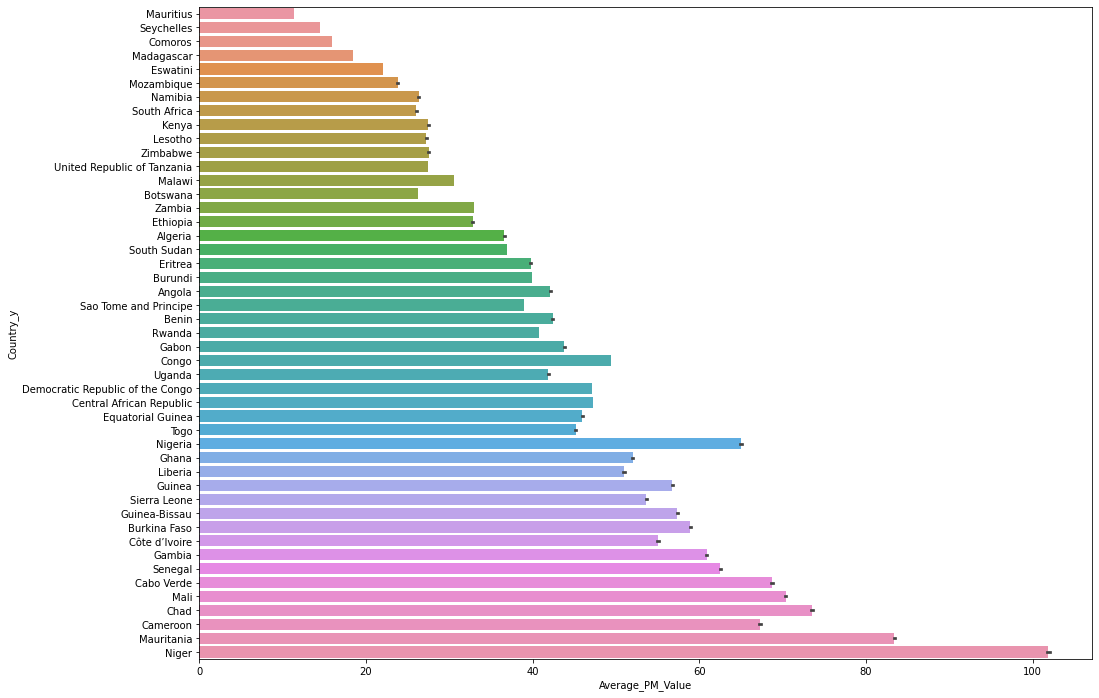

In [ ]:
#Graph of countries in Africa against Average PM concentration.
plt.figure(figsize=(16,12))
sns.barplot(x='Average_PM_Value',y='Country_y', data=merged_df)
plt.show()


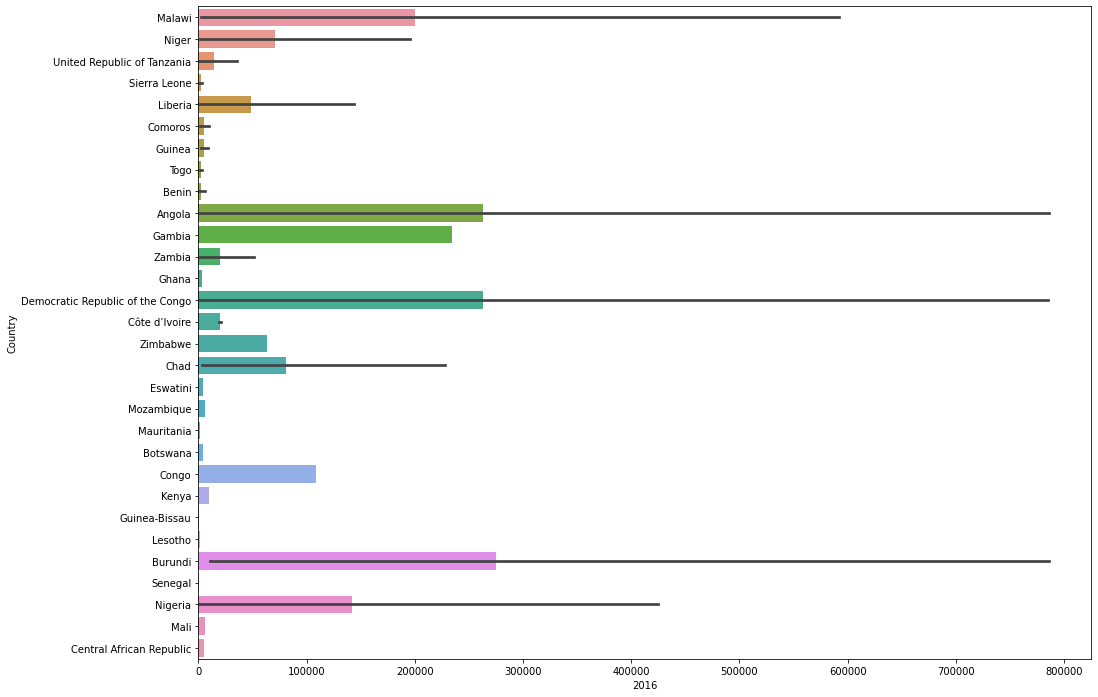

In [ ]:
#Graph of the countries in Africa against CO2 concentration  
plt.figure(figsize=(16,12))
sns.barplot(x='2016',y='Country', data=CO2_merged_df)
plt.show()

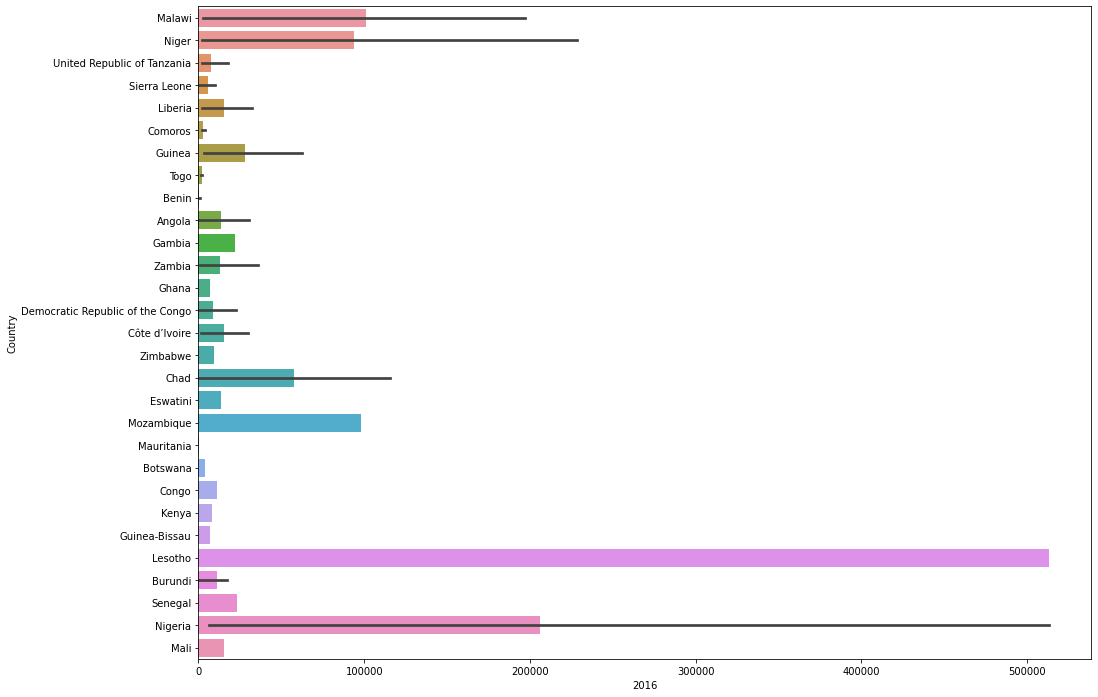

In [ ]:
#Graph of the NO countries in Africa against concentration 
plt.figure(figsize=(16,12))
sns.barplot(x=2016,y='Country', data=NO_merged_df)
plt.show()

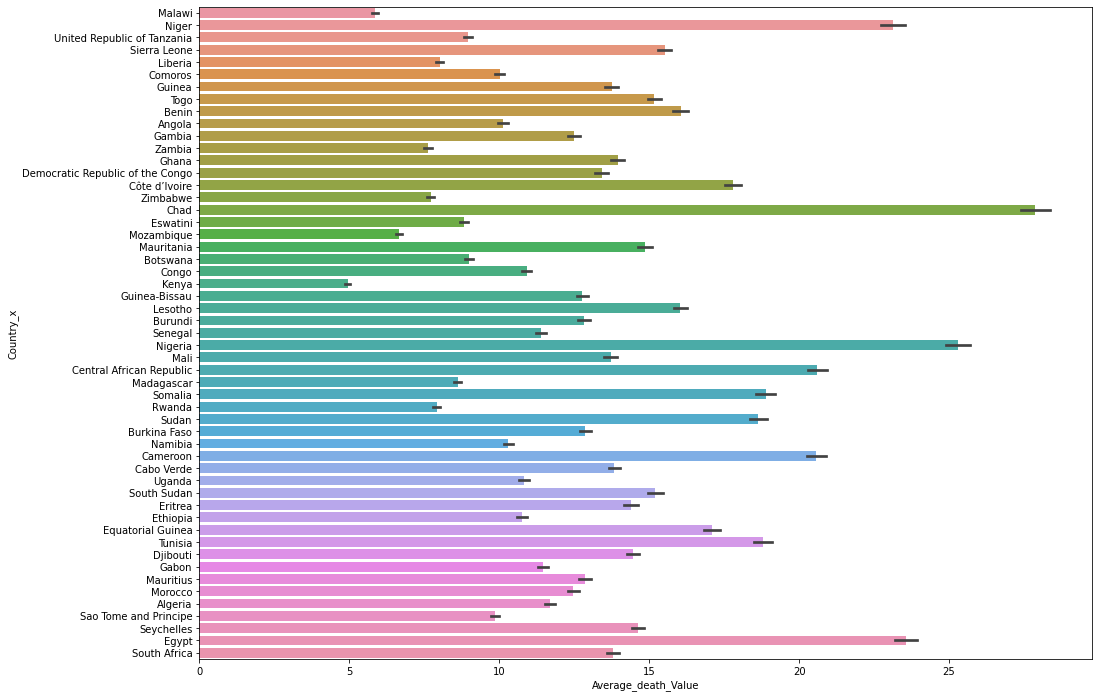

In [ ]:
# Graph of Countries against Mortality rates across the continent
plt.figure(figsize=(16,12))
sns.barplot(x='Average_death_Value',y='Country_x', data=merged_df)
plt.show()

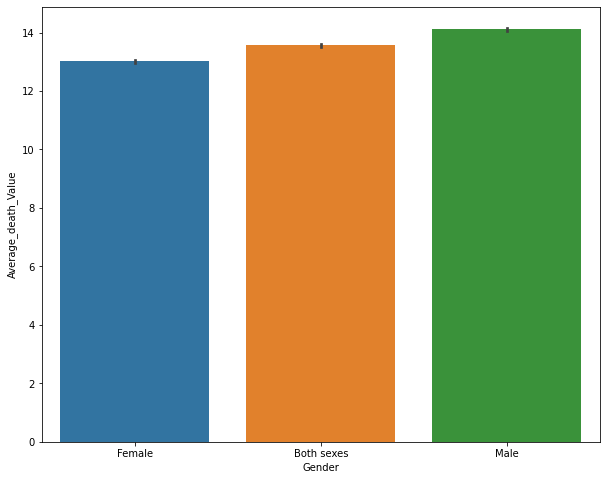

In [ ]:
# A graph of gender against Mortality rates
plt.figure(figsize=(10,8))
sns.barplot(x='Gender',y='Average_death_Value', data=merged_df)
plt.show()

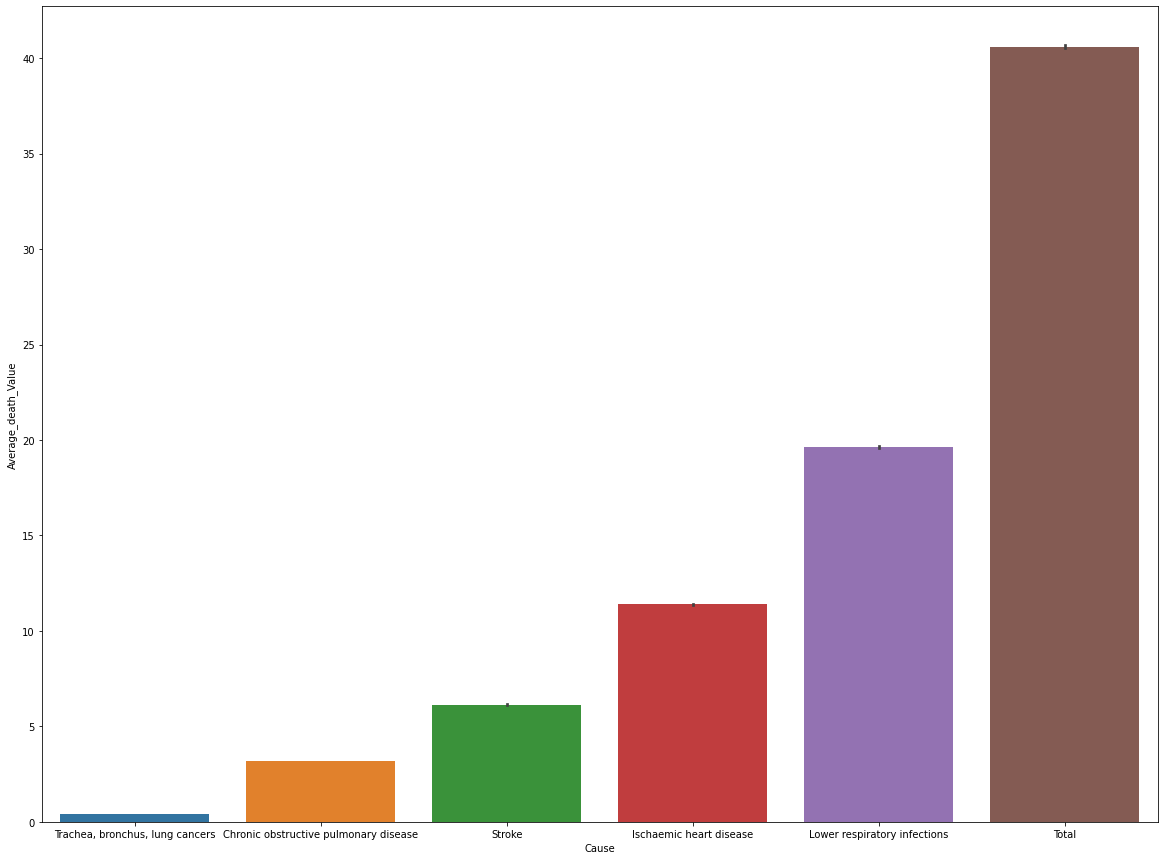

In [ ]:
# A graph of cause of death against the average death value
plt.figure(figsize=(20,15))
sns.barplot(x='Cause',y='Average_death_Value', data=merged_df)
plt.show()

In [ ]:
!ls

'CO2 Emission in KT. in excel.csv'
'Death due to respiratory conditions (new).csv'
'Nitogen Oxide Emissions edited.xlsx'
'Particulate Matter Concentration world wide...csv'
 PM_concentration.csv
 sample_data
 WHO_AirQuality_Database_2016_Africa.csv


In [ ]:
# !streamlit run app.py &>/dev/null&



* Interactive Visualization.
